## ライブラリのインポート

In [152]:
!pip install -q japanize-matplotlib
!pip install -q seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [153]:
# 各種ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# #日本語化matplotlibのインポート & 日本語のフォントを指定
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAexGothic'

import warnings
warnings.filterwarnings('ignore')

## データの読み込み

|カラム名|説明|
|:-----------|:------------|
|id|行の通し番号（顧客ID）|
|age|年齢|
|job|職種|
|marital|未婚/既婚|
|education|教育水準|
|default|債務不履行があるか（yes, no）|
|balance|貯蓄残高（€）|
|housing|住宅ローン（yes, no）|
|loan|個人ローン（yes, no）|
|contact|連絡方法|
|day|最終接触日|
|month|最終接触月|
|duration|最終接触時間（秒）|
|campaign|現キャンペーンにおける接触回数|
|pdays|経過日数：前キャンペーン接触後の日数|
|previous|現キャンペーン以前までに顧客に接触した回数|
|poutcome|前回のキャンペーンの成果|
|y|キャンペーンの反応有無（1:有, 0:無）|

In [154]:
import pandas as pd
from IPython.display import display

# データのパスを指定
train_file_path = './data/tt_train.csv'  # 訓練データ
test_file_path = './data/tt_test.csv'   # テストデータ

# データフレームの読み込み
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

# 全ての行と列を表示する設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [155]:
display(train.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [156]:
display(test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


## データの前処理

In [157]:
# カテゴリ変数のダミー変数化
train_X = train.drop(["y"], axis=1)
train_y = train["y"]

train_X = pd.get_dummies(train_X, drop_first=True)
test_X = pd.get_dummies(test, drop_first=True)

# train_X と test_X の列が一致しない場合の対応
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

1.	カテゴリ変数を数値化:
pd.get_dummies を使用して、カテゴリ変数をダミー変数に変換します。
2.	訓練データと目標値の分離:
特徴量（train_X）と正解ラベル（train_y）を明確に分けます。
3.	列構造の統一:
train_X と test_X の列構造が一致するよう調整します。このステップは、モデルが異なる列構造のデータを処理できない問題を防ぎます。

## モデリング

In [158]:
!brew install -q libomp

In [159]:
!pip install -q lightgbm
!pip install -q xgboost
!pip install -q lightgbm scikit-learn
!pip install -q graphviz pydotplus
!pip install -q palmerpenguins


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [160]:
import lightgbm as lgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## LightGBM

In [161]:
# モデルを初期化
tree = lgb.LGBMRegressor(max_depth=2, random_state=0)

# モデルを学習
tree.fit(train_X, train_y)

# 予測
pred = tree.predict(test_X)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 27128, number of used features: 43
[LightGBM] [Info] Start training from score 0.117001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [162]:
from sklearn.preprocessing import MinMaxScaler

# スケーリングを行う
scaler = MinMaxScaler()
pred_scaled = scaler.fit_transform(pred.reshape(-1, 1))

# 閾値（例えば 0.5）で分類
pred_class = (pred_scaled > 0.5).astype(int)

# 出力
print(pred_class)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


### 説明変数の重要度の確認

In [163]:
# 説明変数の重要度の表示
tree.feature_importances_

array([ 0, 20,  8, 19, 85,  8, 18,  2,  0,  0,  0,  0,  0,  0,  0,  4,  0,
        0,  0,  4,  2,  0,  3,  0,  0, 18,  3,  1, 16,  1,  8,  1,  4,  7,
        4, 17,  0,  3, 12, 10,  1, 21,  0], dtype=int32)

In [164]:
# 重要度にカラム名を付与して、さらに重要度の高い順に並べ変える
fi = pd.Series(tree.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# 重要度の高い順に先頭5個を表示
fi.head(10)

duration            85
poutcome_success    21
age                 20
day                 19
housing_yes         18
pdays               18
month_mar           17
contact_unknown     16
month_oct           12
month_sep           10
dtype: int32

#### グリッドサーチ用のライブラリのインポート

In [165]:
# グリッドサーチ用のライブラリのインポート
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#### グリッドサーチのオプション（パラメータの範囲など）を指定する

In [167]:
# 交差検証の設定
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# モデルの初期化（箱を用意）
tree = lgb.LGBMRegressor(random_state=0)

# max_depthを2～10の範囲で1ずつ変化させるように指定
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10] ,
              "min_samples_leaf": [10, 20, 50, 100, 200]}

# グリッドサーチの設定
# gcv = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

# GridSearchCVのインスタンス作成（return_train_score=Trueを指定）
gcv = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)



# モデルの初期化（箱を用意）
tree = DT(random_state=0)

# max_depthを4～12の範囲で5つ指定、min_samples_leafを10～200の範囲で5つ指定（5×5=25通りの探索)
parameters = {"max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [10, 20, 50, 100, 200]}

# グリッドサーチの設定
gcv3 = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

#### グリッドサーチの実行

In [168]:
gcv.fit(train_X, train_y)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1261
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 43
[LightGBM] [Info] Start training from score 0.118607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

#### グリッドサーチの結果の確認 (精度変化の可視化)

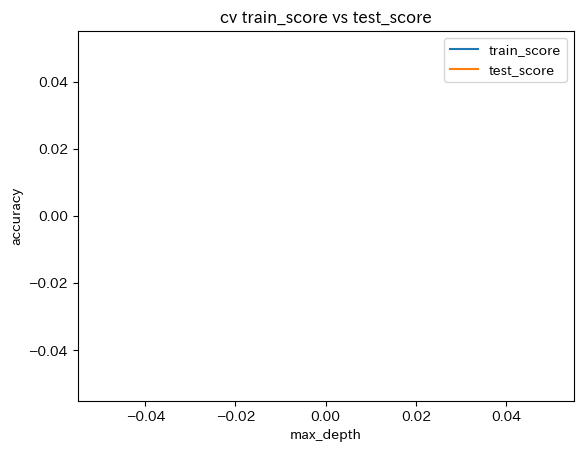

In [132]:
# 学習に用いたデータを使って評価した精度
train_score = gcv.cv_results_["mean_train_score"]

# 学習に用いなかったデータ(検証用データ)を使って評価した精度
test_score = gcv.cv_results_["mean_test_score"]

# 精度変化の可視化
plt.plot(parameters["max_depth"], train_score, label="train_score")
plt.plot(parameters["max_depth"], test_score, label="test_score")
plt.title("cv train_score vs test_score")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [133]:
# グリッドサーチで見つかった最適なパラメータ値を確認する
best_params = gcv.best_params_
best_params

{'max_depth': 2}

#### 最適なパラメータ値のモデルを使って予測

In [ ]:
# 最適なパラメータ値(max_depth=7)を使って学習したモデルを用意する
best_model = gcv.best_estimator_

# 上で用意した最適なパラメータ値のモデルを使って予測を行う
pred_gcv= best_model.predict(test_X)

In [ ]:
# モデルの初期化（箱を用意）
tree = DT(random_state=0)

# min_samples_leafを5～500の範囲で6つ指定
parameters = {"min_samples_leaf": [5, 10, 20, 50, 100, 500]}

# グリッドサーチの設定
gcv2 = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

In [ ]:
# グリッドサーチの実行
gcv2.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

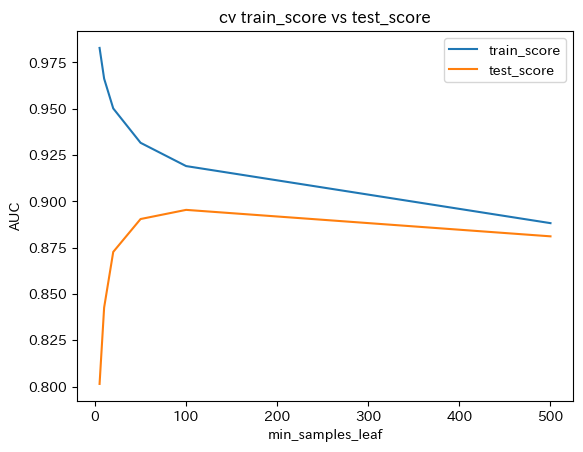

In [ ]:
# 学習に用いたデータを使って評価した精度
train_score2 = gcv2.cv_results_["mean_train_score"]

# 学習にも用いなかったデータ(検証用データ)を使って評価した精度
test_score2 = gcv2.cv_results_["mean_test_score"]

# 精度変化の可視化
plt.plot(parameters["min_samples_leaf"], train_score2, label="train_score")
plt.plot(parameters["min_samples_leaf"], test_score2, label="test_score")
plt.title("cv train_score vs test_score")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [ ]:
# グリッドサーチで見つかった最適なパラメータ値を確認する
best_params2 = gcv2.best_params_
best_params2

{'min_samples_leaf': 100}

In [ ]:
# 最適なパラメータ値(min_samples_leaf=?)を使って学習したモデルを用意する
best_model2 = gcv2.best_estimator_

# 上で用意した最適なパラメータ値のモデルを使って予測を行う
pred_gcv2 = best_model2.predict(test_X)

#### ここで予測結果を投稿してみましょう（4回目）

In [ ]:
# 投稿用サンプルファイルに予測結果を代入する
submit[1] = pred_gcv2

# 投稿用ファイルの保存 ⇒ この後Challenge Missionの「投稿する」ボタンを押すと結果が表示されます
submit.to_csv("submit_gcv2.csv", index=False, header=False)

#### <span style="color: red;">※演習③はここまでを実行</span>
---

## 最適なパラメータの"組み合わせ"を自動で探索する（max_depthとmin_samples_leafの組み合わせを探索）
- ここまでは、max_depthとmin_samples_leafの2つのパラメータに対して、それぞれ単独でグリッドサーチにかけ最適値を探索してきましたが、複数のパラメータの最適な「組み合わせ」を探索することもできます。
- 複数のパラメータの組み合わせを探索する場合も、これまでと同様に変数parametersに、2つのパラメータの範囲を指定するだけです。
- ただし注意点として、複数のパラメータの組み合わせは数が膨大になりがちです。（例えばmax_depthの9通り×min_samples_leafの6通り = 合計54通りの探索になる）
- 探索する数が多ければ多いほど、グリッドサーチにかかる計算が膨れ上がるので、計算リソースや時間が限られる場合は、パラメータの範囲を少し間引きして組み合わせるのも良いでしょう。
- ここでは、max_depthの範囲を4～12の範囲で2ずつ変化させ、min_samples_leafの範囲は10～200の範囲でとびとびに5つ指定します（5×5=25通りの探索）

In [ ]:
# モデルの初期化（箱を用意）
tree = DT(random_state=0)

# max_depthを4～12の範囲で5つ指定、min_samples_leafを10～200の範囲で5つ指定（5×5=25通りの探索)
parameters = {"max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [10, 20, 50, 100, 200]}

# グリッドサーチの設定
gcv3 = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

In [ ]:
# グリッドサーチの実行
gcv3.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [10, 20, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
# 学習に用いたデータを使って評価した精度
train_score3 = gcv3.cv_results_["mean_train_score"]

# 学習にも用いなかったデータ(検証用データ)を使って評価した精度
test_score3 = gcv3.cv_results_["mean_test_score"]

print(train_score3)
print(test_score3)

[0.8440384  0.84401865 0.84398385 0.8438132  0.84664583 0.86887814
 0.87142571 0.8723738  0.8710193  0.88197875 0.89724845 0.89794091
 0.89399718 0.894654   0.89668161 0.92083323 0.91751935 0.91102049
 0.90767982 0.90375525 0.93506289 0.92867001 0.92008166 0.91425846
 0.90518336]
[0.83831317 0.83833429 0.83837241 0.83830943 0.8451773  0.85610304
 0.86171668 0.86285876 0.86341385 0.87715138 0.86748144 0.87620277
 0.8798231  0.88229643 0.88735766 0.86952137 0.88622164 0.89063594
 0.89131572 0.89164791 0.859028   0.88245101 0.89312134 0.8936742
 0.89239291]


Text(0.5, 1.0, 'AUC scores (max_depth vs min_samples_leaf)')

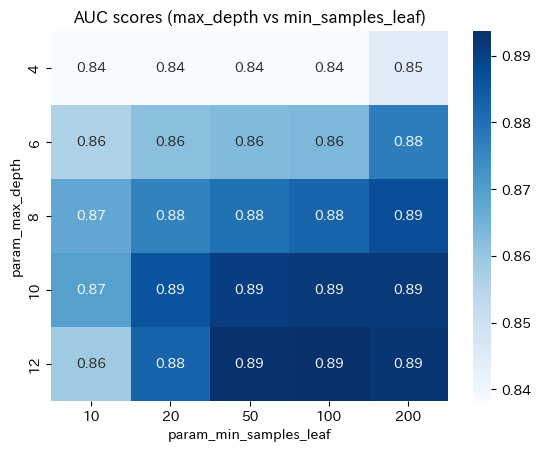

In [ ]:
# パラメータの組み合わせ結果の可視化
cv_result_df = pd.DataFrame(gcv3.cv_results_)
cv_result_pivot = cv_result_df.pivot_table("mean_test_score", "param_max_depth", "param_min_samples_leaf")
sns.heatmap(cv_result_pivot, annot=True, cmap='Blues')
plt.title("AUC scores (max_depth vs min_samples_leaf)")

In [ ]:
# グリッドサーチで見つかった最適なパラメータ値を確認する
best_params3 = gcv3.best_params_
best_params3

{'max_depth': 12, 'min_samples_leaf': 100}

In [ ]:
# 最適なパラメータ値(max_depth=8, min_samples_leaf=200)を使って学習したモデルを用意する
best_model3 = gcv3.best_estimator_

# 上で用意した最適なパラメータ値のモデルを使って予測を行う
pred_gcv3 = best_model3.predict(test_X)

#### 予測結果を投稿してみましょう（5回目）

In [ ]:
# 投稿用サンプルファイルに予測結果を代入する
submit[1] = pred_gcv3

# 投稿用ファイルの保存 ⇒ この後Challenge Missionの「投稿する」ボタンを押すと結果が表示されます
submit.to_csv("submit_gcv3.csv", index=False, header=False)

[0.84401865 0.84393887 0.84399316 0.84406347 0.8438132  0.87142571
 0.87267236 0.8723578  0.87135729 0.8710193  0.89794091 0.89496654
 0.89462545 0.89477472 0.894654   0.91751935 0.91249583 0.91080643
 0.90839173 0.90767982 0.92867001 0.92165611 0.91923793 0.91588087
 0.91425846]
[0.83833429 0.8384086  0.83823968 0.83843996 0.83830943 0.86171668
 0.86288207 0.86330277 0.862662   0.86341385 0.87620277 0.879193
 0.87990286 0.88189735 0.88229643 0.88622164 0.88957112 0.89170891
 0.89115574 0.89131572 0.88245101 0.8914395  0.89501622 0.89525478
 0.8936742 ]


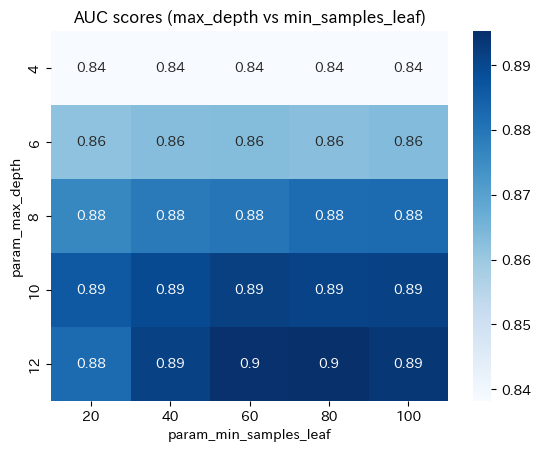

In [ ]:
# モデルの初期化（箱を用意）
tree = DT(random_state=0)

# max_depthを4～12の範囲で5つ指定、min_samples_leafを10～200の範囲で5つ指定（5×5=25通りの探索)
parameters = {"max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [20, 40, 60, 80, 100]}

# グリッドサーチの設定
gcv5 = GridSearchCV(tree, parameters, cv=5, scoring='roc_auc', return_train_score=True)

# グリッドサーチの実行
gcv5.fit(train_X, train_y)

# 学習に用いたデータを使って評価した精度
train_score5 = gcv5.cv_results_["mean_train_score"]

# 学習にも用いなかったデータ(検証用データ)を使って評価した精度
test_score5 = gcv5.cv_results_["mean_test_score"]

print(train_score5)
print(test_score5)

# パラメータの組み合わせ結果の可視化
cv_result_df = pd.DataFrame(gcv5.cv_results_)
cv_result_pivot = cv_result_df.pivot_table("mean_test_score", "param_max_depth", "param_min_samples_leaf")
sns.heatmap(cv_result_pivot, annot=True, cmap='Blues')
plt.title("AUC scores (max_depth vs min_samples_leaf)")

# グリッドサーチで見つかった最適なパラメータ値を確認する
best_params5 = gcv5.best_params_
best_params5

# 最適なパラメータ値(max_depth=8, min_samples_leaf=200)を使って学習したモデルを用意する
best_model5 = gcv5.best_estimator_

# 上で用意した最適なパラメータ値のモデルを使って予測を行う
pred_gcv5 = best_model5.predict(test_X)

In [ ]:
# 投稿用サンプルファイルに予測結果を代入する
submit[1] = pred_gcv5

# 投稿用ファイルの保存 ⇒ この後Challenge Missionの「投稿する」ボタンを押すと結果が表示されます
submit.to_csv("submit_gcv5.csv", index=False, header=False)